In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp
import pickle

In [2]:
# Carica i dati dal file
with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/num_branches.pkl', 'rb') as file:
    data = pickle.load(file)

    num_branches_VISp = data['VISp']
    num_branches_VISal = data['VISal']
    num_branches_SSp_bfd = data['SSp_bfd']

Statistiche descrittive per VISp: {'mean': 308.57954545454544, 'std': 309.4580204160063, 'median': 198.0}
Statistiche descrittive per VISal: {'mean': 346.5625, 'std': 221.46372974767223, 'median': 264.5}
Statistiche descrittive per SSp_bfd: {'mean': 375.8818181818182, 'std': 288.86743520855197, 'median': 311.0}


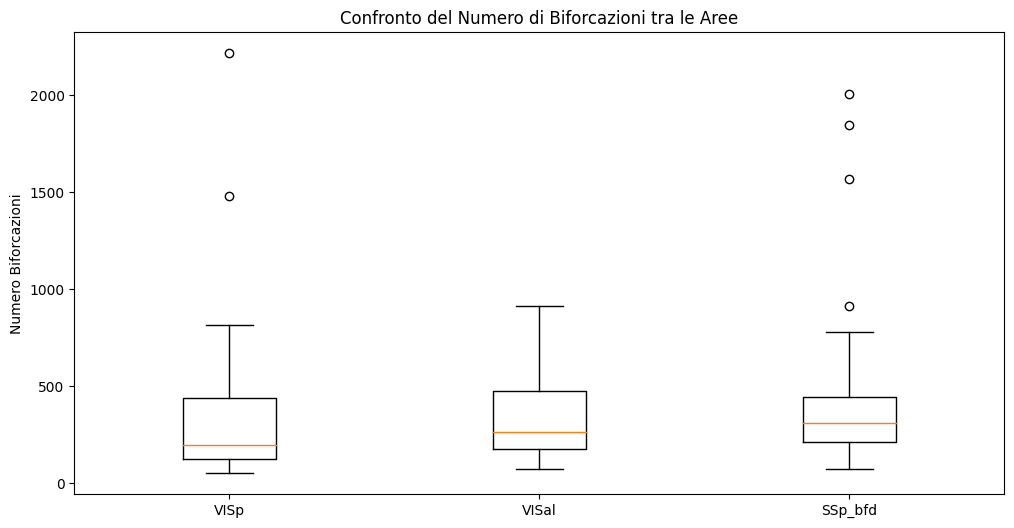

In [3]:
# Analisi statistica
def descriptive_stats(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'median': np.median(data)
    }

stats_VISp = descriptive_stats(num_branches_VISp)
stats_VISal = descriptive_stats(num_branches_VISal)
stats_SSp_bfd = descriptive_stats(num_branches_SSp_bfd)

print("Statistiche descrittive per VISp:", stats_VISp)
print("Statistiche descrittive per VISal:", stats_VISal)
print("Statistiche descrittive per SSp_bfd:", stats_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([ num_branches_VISp,  num_branches_VISal,  num_branches_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Numero Biforcazioni')
plt.title('Confronto del Numero di Biforcazioni tra le Aree')
plt.show()

In [4]:
# Eseguire il t-test tra VISp e VISal
t_statistic_VISp_VISal, p_value_VISp_VISal = ttest_ind(num_branches_VISp, num_branches_VISal)
print(f"T-test VISp vs VISal: t-statistic = {t_statistic_VISp_VISal} , p-value = {p_value_VISp_VISal}")

# Eseguire il t-test tra VISp e SSp_bfd
t_statistic_VISp_SSp_bfd, p_value_VISp_SSp_bfd = ttest_ind(num_branches_VISp, num_branches_SSp_bfd)
print(f"T-test VISp vs SSp_bfd: t-statistic = {t_statistic_VISp_SSp_bfd} , p-value = {p_value_VISp_SSp_bfd}")

# Eseguire il t-test tra VISal e SSp_bfd
t_statistic_VISal_SSp_bfd, p_value_VISal_SSp_bfd = ttest_ind(num_branches_VISal, num_branches_SSp_bfd)
print(f"T-test VISal vs SSp_bfd: t-statistic = {t_statistic_VISal_SSp_bfd} , p-value = {p_value_VISal_SSp_bfd}")

# Eseguire il KS-test tra VISp e VISal
ks_statistic_VISp_VISal, ks_p_value_VISp_VISal = ks_2samp(num_branches_VISp, num_branches_VISal)
print(f"KS-test VISp vs VISal: ks-statistic = {ks_statistic_VISp_VISal} , p-value = {ks_p_value_VISp_VISal}")

# Eseguire il KS-test tra VISp e SSp_bfd
ks_statistic_VISp_SSp_bfd, ks_p_value_VISp_SSp_bfd = ks_2samp(num_branches_VISp, num_branches_SSp_bfd)
print(f"KS-test VISp vs SSp_bfd: ks-statistic = {ks_statistic_VISp_SSp_bfd} , p-value = {ks_p_value_VISp_SSp_bfd}")

# Eseguire il KS-test tra VISal e SSp_bfd
ks_statistic_VISal_SSp_bfd, ks_p_value_VISal_SSp_bfd = ks_2samp(num_branches_VISal, num_branches_SSp_bfd)
print(f"KS-test VISal vs SSp_bfd: ks-statistic = {ks_statistic_VISal_SSp_bfd} , p-value = {ks_p_value_VISal_SSp_bfd}")

T-test VISp vs VISal: t-statistic = -0.6321591033406629 , p-value = 0.5285058593480416
T-test VISp vs SSp_bfd: t-statistic = -1.5701125586837061 , p-value = 0.11800187152658617
T-test VISal vs SSp_bfd: t-statistic = -0.5268341454576257 , p-value = 0.5991425270748609
KS-test VISp vs VISal: ks-statistic = 0.23579545454545456 , p-value = 0.12498501080186267
KS-test VISp vs SSp_bfd: ks-statistic = 0.36363636363636365 , p-value = 3.010283285914989e-06
KS-test VISal vs SSp_bfd: ks-statistic = 0.21022727272727273 , p-value = 0.19056899189498


### Analisi statistica dei risultati

#### Test t di Student:

1. **T-test VISp vs VISal:**
   - **t-statistic = -0.6321591033406629**
   - **p-value = 0.5285058593480416**

   **Interpretazione:** La statistica t non è significativa (p > 0.05). Questo indica che non c'è una differenza statisticamente significativa nel numero medio di foglie tra i neuroni nelle aree VISp e VISal. I neuroni di queste due aree hanno un numero medio di foglie simile.

2. **T-test VISp vs SSp_bfd:**
   - **t-statistic = -1.5701125586837061**
   - **p-value = 0.11800187152658617**

   **Interpretazione:** Anche in questo caso, la statistica t non è significativa (p > 0.05), indicando che non c'è una differenza statisticamente significativa nel numero medio di foglie tra i neuroni nelle aree VISp e SSp_bfd. Tuttavia, il p-value è più vicino a 0.05 rispetto al confronto precedente, suggerendo una possibile tendenza verso una differenza, ma non abbastanza forte per essere conclusiva.

3. **T-test VISal vs SSp_bfd:**
   - **t-statistic = -0.5268341454576257**
   - **p-value = 0.5991425270748609**

   **Interpretazione:** La statistica t non è significativa (p > 0.05). Non c'è una differenza statisticamente significativa nel numero medio di foglie tra i neuroni nelle aree VISal e SSp_bfd, suggerendo che il numero medio di foglie è simile anche in queste aree.

#### Test di Kolmogorov-Smirnov (KS):

1. **KS-test VISp vs VISal:**
   - **ks-statistic = 0.23579545454545456**
   - **p-value = 0.12498501080186267**

   **Interpretazione:** La statistica KS non è significativa (p > 0.05), indicando che non c'è una differenza statisticamente significativa nella distribuzione del numero di foglie tra i neuroni nelle aree VISp e VISal. Le distribuzioni sono simili.

2. **KS-test VISp vs SSp_bfd:**
   - **ks-statistic = 0.36363636363636365**
   - **p-value = 3.010283285914989e-06**

   **Interpretazione:** La statistica KS è significativa (p < 0.05), indicando una differenza statisticamente significativa nella distribuzione del numero di foglie tra i neuroni nelle aree VISp e SSp_bfd. Questo suggerisce che le distribuzioni del numero di foglie in queste due aree sono diverse.

3. **KS-test VISal vs SSp_bfd:**
   - **ks-statistic = 0.21022727272727273**
   - **p-value = 0.19056899189498**

   **Interpretazione:** La statistica KS non è significativa (p > 0.05), indicando che non c'è una differenza statisticamente significativa nella distribuzione del numero di foglie tra i neuroni nelle aree VISal e SSp_bfd. Le distribuzioni sono simili.

### Sintesi:

- **Test t di Student:** Non mostrano differenze significative tra le aree, suggerendo che i numeri medi di foglie sono simili tra le aree confrontate.
- **Test di Kolmogorov-Smirnov:** Rivelano una differenza significativa tra VISp e SSp_bfd, indicando che la distribuzione del numero di foglie nei neuroni di queste due aree è diversa. Tuttavia, le altre combinazioni di aree non mostrano differenze significative.

### Conclusioni:

I risultati suggeriscono che mentre il numero medio di foglie potrebbe essere simile tra le diverse aree corticali, le distribuzioni possono differire in modo significativo, in particolare tra VISp e SSp_bfd. Questo potrebbe indicare differenze strutturali più sottili nella morfologia dei neuroni tra queste aree.